In [1]:
from basecar import BaseCar
from basisklassen import FrontWheels, BackWheels
from basisklassen_cam import Camera
import time
import json
import numpy as np
import matplotlib.pylab as plt
import cv2
import matplotlib.pyplot as plt

In [53]:
class CameraCar(BaseCar):

    def __init__(self, front, back, camera, values_to_log):
        super().__init__(front, back, values_to_log)
        self.camera = camera
        self.picture_collect()
        print("CameraCar erzeugt")

    def picture_collect(self):
        img = self.camera.get_frame()
        self.camera.release()
        img_small = cv2.resize(img, None, fx=0.25, fy=0.25)
        # plt.imshow(img_small)
        cv2.imwrite("Bild.jpg", img)

In [79]:
front = FrontWheels()
back = BackWheels()
cam = Camera(devicenumber = 0,
            buffersize = 10,
            skip_frame = 0,
            height = 480,
            width = 640,
            flip = True,
            #colorspace = 'rgb'
            )

In [80]:
cam_car = CameraCar(front,back,cam, [])

Daten in config.json:
 - Turning Offset:  0
 - Forward A:  0
 - Forward B:  0
BaseCar erzeugt


CameraCar erzeugt


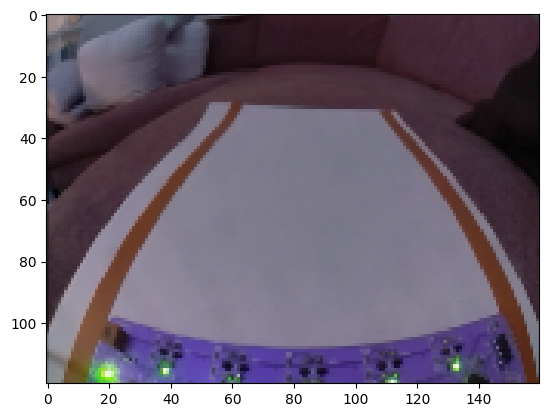

In [81]:
img = cv2.imread("Bild.jpg")
img_small = cv2.resize(img, None, fx=0.25, fy=0.25)
plt.imshow(img_small)

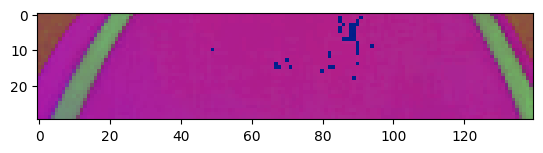

In [105]:
img_cropped = img_small[65:95, 10:150, :]
hsv = cv2.cvtColor(img_cropped,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

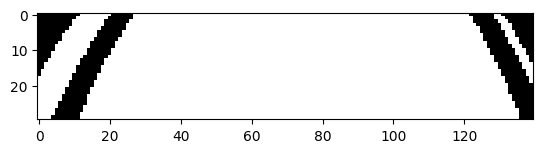

In [106]:
lower_blue = np.array([50, 100, 100])
upper_blue = np.array([180, 255, 255])

img_filtered = cv2.inRange(img_cropped, lower_blue, upper_blue)
plt.imshow(img_filtered, cmap="gray")

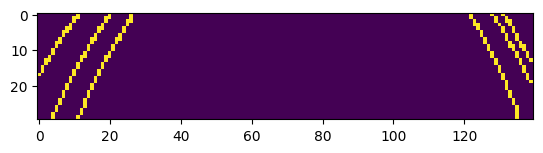

In [107]:
img_edges = cv2.Canny(img_filtered, 900, 1000)
plt.imshow(img_edges)

In [112]:
lines = cv2.HoughLinesP(img_edges,  1, np.pi / 180, threshold=15, minLineLength=19, maxLineGap=10)
print(lines)

[[[  4  28  17   4]]

 [[ 11  29  26   0]]

 [[124   3 135  27]]

 [[128   0 139  19]]]


In [113]:
line_img = img_cropped.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 1)

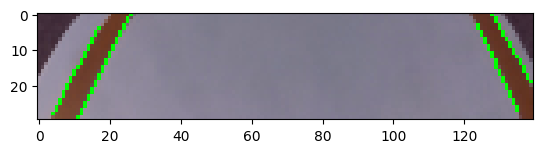

In [114]:
plt.imshow(line_img)

[GitLab OpenCV Link](https://gitlab.com/u4i/camp2code/-/blob/coachmarkets/13_OpenCV/04_%C3%9Cbungen_CM13/Exercise_CM13_deutsch_L%C3%B6sungen.ipynb?ref_type=heads)

In [115]:
rxEnd, ryEnd, rxStart, ryStart = lines[0][0]
print(rxEnd, ryEnd, rxStart, ryStart)

4 28 17 4


In [116]:
l = np.sqrt((rxEnd-rxStart)**2 + (ryEnd - ryStart)**2)
print(l)

27.294688127912362


In [117]:
if lines is not None:
    rechts = []
    links = []
    for line in lines:
        xEnd, yEnd, xStart, yStart = line[0]
        länge = np.sqrt((rxEnd-rxStart)**2 + (ryEnd - ryStart)**2)
        if xStart < 60:
            print("Links")
            links.append(line[0])
        elif xStart > 60:
            print("Rechts")
            rechts.append(line[0])
rdurch = (rechts[0] + rechts[1])/2
ldurch = (links[0] + links[1])/2
print(rdurch)
print(ldurch)


Links
Links
Rechts
Rechts
[126.    1.5 137.   23. ]
[ 7.5 28.5 21.5  2. ]


In [118]:
alpha2 = np.arctan((rdurch[3]-rdurch[1])/(rdurch[2]-rdurch[0]))
alpha2 = np.degrees(alpha2)
alpha2

62.90444750624821

In [119]:
alpha = np.arctan((ldurch[3]-ldurch[1])/(ldurch[2]-ldurch[0]))
alpha = abs(np.degrees(alpha))
alpha

62.152421740211835